# ***Analisando a diferença de altura e peso entre atletas de nataçao medalhistas e não medalhistas***

## **Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Dados**

In [3]:
df_olimpiadas = pd.read_csv('/content/drive/MyDrive/LABCD_Artigo/Dados/athlete_events.csv')
df_olimpiadas

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## **Pré-processamento**

- Selecionando apenas as variáveis de interesse

In [4]:
df_olimpiadas = df_olimpiadas.drop(columns=['Name', 'Age', 'Team', 'Event', 'NOC', 'Games', 'City'])
df_olimpiadas.head(4)

,ID,Sex,Height,Weight,Year,Season,Sport,Medal
0,1,M,180.0,80.0,1992,Summer,Basketball,NaN
1,2,M,170.0,60.0,2012,Summer,Judo,NaN
2,3,M,NaN,NaN,1920,Summer,Football,NaN
3,4,M,NaN,NaN,1900,Summer,Tug-Of-War,Gold


In [5]:
df_olimpiadas = df_olimpiadas.rename(columns={'Sex': 'sexo', 'Height': 'altura', 'Weight': 'peso', 'Year': 'ano',
                                              'Season': 'estacao', 'Sport': 'esporte', 'Medal': 'medalha'})

- Selecionando apenas atletas de ***natação*** que competiram a partir de 1912, ano em que a primeira mulher competiu

In [6]:
df_olimpiadas = df_olimpiadas[(df_olimpiadas['estacao']=='Summer') & (df_olimpiadas['esporte']=='Swimming') & (df_olimpiadas['ano'] > 1912)]

- Categorizando os atletas em medalhistas e não medalhistas

In [7]:
df_olimpiadas['medalha'] = np.where(df_olimpiadas['medalha'].isna()==True, 0, 1)

In [8]:
df_olimpiadas['medalhista'] = df_olimpiadas.groupby('ID')['medalha'].transform(lambda x: 1 if (x == 1).any() else 0)

- Retirando colunas desnecessárias, NAs e valores duplicados gerados pelo drop das colunas

In [9]:
df_olimpiadas.dropna(subset=['peso', 'altura'], inplace=True)

In [10]:
df_olimpiadas = df_olimpiadas.drop(columns=['ano', 'estacao', 'esporte', 'medalha'])

In [11]:
df_olimpiadas = df_olimpiadas.drop_duplicates()

- Retirando amostras para o estudo

In [12]:
amostra_mulheres_medalhistas = df_olimpiadas[(df_olimpiadas['sexo']=='F') & (df_olimpiadas['medalhista']==1)].sample(n=100, random_state=121)

amostra_mulheres_nao_medalhistas = df_olimpiadas[(df_olimpiadas['sexo']=='F') & (df_olimpiadas['medalhista']==0)].sample(n=100, random_state=121)

amostra_homens_medalhistas = df_olimpiadas[(df_olimpiadas['sexo']=='M') & (df_olimpiadas['medalhista']==1)].sample(n=100, random_state=121)

amostra_homens_nao_medalhistas = df_olimpiadas[(df_olimpiadas['sexo']=='M') & (df_olimpiadas['medalhista']==0)].sample(n=100, random_state=121)

## **Análise Descritiva**

### **Sobre o dataset geral de nadadores**

- Temos observações únicas referentes a cada atleta ✅

In [13]:
df_olimpiadas['ID'].value_counts()

36        1
90465     1
90849     1
90844     1
90735     1
         ..
45025     1
45018     1
45009     1
44980     1
135556    1
Name: ID, Length: 6466, dtype: int64

- Há menos medalhistas do que não medalhistas, o que já era esperado ✅


In [14]:
fig1 = df_olimpiadas['medalhista'].value_counts()
fig1

0    5215
1    1251
Name: medalhista, dtype: int64

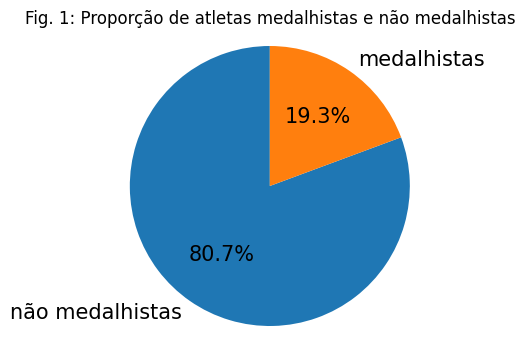

In [15]:
plt.figure(figsize=(6, 4))
plt.title('Fig. 1: Proporção de atletas medalhistas e não medalhistas')
sns.set_palette('Paired')
plt.pie(fig1, autopct='%1.1f%%', labels=['não medalhistas', 'medalhistas'],
        startangle=90, textprops={'fontsize': 15})
plt.axis('equal');

plt.savefig('fig1.png', dpi=300)

- A distribuição de mulheres e homens é razoavelmente proporcional ✅

In [16]:
fig2 = df_olimpiadas['sexo'].value_counts()
fig2

M    3555
F    2911
Name: sexo, dtype: int64

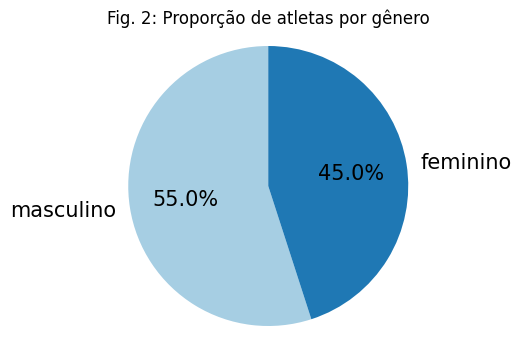

In [17]:
plt.figure(figsize=(6, 4))
plt.title('Fig. 2: Proporção de atletas por gênero')
sns.set_palette('Paired')
plt.pie(fig2, autopct='%1.1f%%', labels=['masculino', 'feminino'],
        startangle=90, textprops={'fontsize': 15})
plt.axis('equal');

plt.savefig('fig2.png', dpi=300)

- A distribuição de atletas medalhistas e não medalhistas por sexo parece ser proporcional ✅

In [18]:
fig3 = df_olimpiadas.groupby('sexo')['medalhista'].value_counts()
fig3

sexo  medalhista
F     0             2314
      1              597
M     0             2901
      1              654
Name: medalhista, dtype: int64

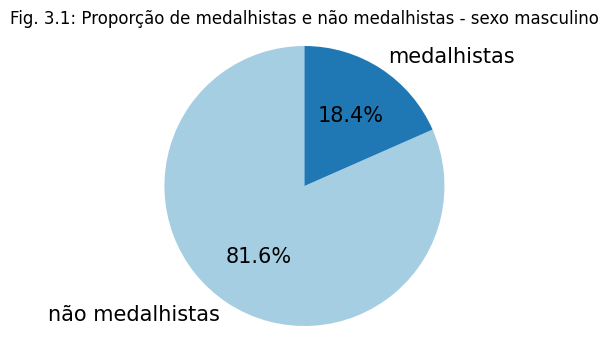

In [19]:
fig3m = fig3['M']

plt.figure(figsize=(6, 4))
plt.title('Fig. 3.1: Proporção de medalhistas e não medalhistas - sexo masculino')
sns.set_palette('Paired')
plt.pie(fig3m, autopct='%1.1f%%', labels=['não medalhistas', 'medalhistas'],
        startangle=90, textprops={'fontsize': 15})
plt.axis('equal');

plt.savefig('fig3_1.png', dpi=300)

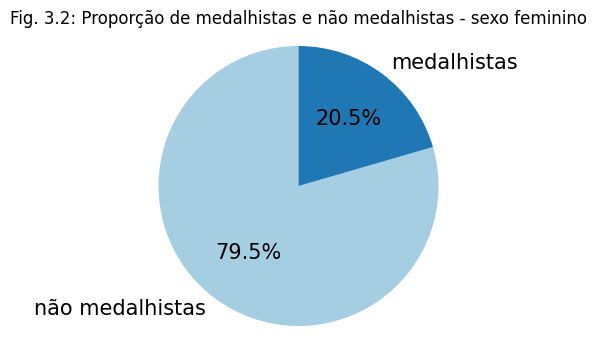

In [20]:
fig3f = fig3['F']

plt.figure(figsize=(6, 4))
plt.title('Fig. 3.2: Proporção de medalhistas e não medalhistas - sexo feminino')
sns.set_palette('Paired')
plt.pie(fig3f, autopct='%1.1f%%', labels=['não medalhistas', 'medalhistas'],
        startangle=90, textprops={'fontsize': 15})
plt.axis('equal');

plt.savefig('fig3_2.png', dpi=300)

### **Estatísticas**

#### Peso

In [21]:
est_peso = df_olimpiadas[['peso', 'sexo', 'medalhista']].groupby(['sexo', 'medalhista']).agg(['mean', 'median', lambda x: x.mode().iat[0], 'max', 'min', 'var', 'std'])

colunas = {
    'mean': 'média',
    'median': 'mediana',
    '<lambda_0>': 'moda',
    'max': 'máximo',
    'min': 'mínimo',
    'var': 'variância',
    'std': 'desvio padrão'
}

est_peso.columns = [colunas.get(col[1], col[1]) for col in est_peso.columns]

est_peso

média  mediana  moda  máximo  mínimo  variância  \
sexo medalhista                                                        
F    0           60.041271     60.0  60.0    85.0    39.0  41.434202   
     1           63.410385     63.0  63.0    85.0    45.0  39.239019   
M    0           76.410893     76.0  75.0   112.0    45.0  71.351799   
     1           80.188073     80.0  80.0   114.0    54.0  68.360439   

                 desvio padrão  
sexo medalhista                 
F    0                6.436940  
     1                6.264106  
M    0                8.446999  
     1                8.268037

> - para os dois generos, as medidas de tendência central sao aproximadamente simetricas, indicando uma possivel distribuição normal
>   - indicativos:
>       - media, mediana e moda sao aproximademnte iguais
>       - a distancia entre a mediana e as medidas de max e min é aproximadamente proporcional
> - As medidas de dispersão indicam uma menor variabilidade dos dados, embora variância sugira que talvez algumas observações desviem mais da média.
>   - indicativoa:
>       - o desvio padrao é relativamente baixo em comparação com a média
>       - variancia moderadamente alta

#### Altura

In [22]:
est_altura = df_olimpiadas[['altura', 'sexo', 'medalhista']].groupby(['sexo', 'medalhista']).agg(['mean', 'median', lambda x: x.mode().iat[0], 'max', 'min', 'var', 'std'])

colunas = {
    'mean': 'média',
    'median': 'mediana',
    '<lambda_0>': 'moda',
    'var': 'variância',
    'std': 'desvio padrão',
    'max': 'máximo',
    'min': 'mínimo'
}

est_altura.columns = [colunas.get(col[1], col[1]) for col in est_altura.columns]

est_altura

média  mediana   moda  máximo  mínimo  variância  \
sexo medalhista                                                          
F    0           169.768366    170.0  170.0   191.0   131.0  48.057866   
     1           173.403685    173.0  173.0   193.0   150.0  44.177369   
M    0           182.870045    183.0  180.0   209.0   147.0  61.173106   
     1           186.441896    187.0  188.0   208.0   152.0  57.364919   

                 desvio padrão  
sexo medalhista                 
F    0                6.932378  
     1                6.646606  
M    0                7.821324  
     1                7.573963

> - para os dois generos, as medidas de tendência central sao aproximadamente simetricas, indicando uma possivel distribuição normal
>   - indicativos:
>       - media, mediana e moda sao aproximademnte iguais
>       - a distancia entre a mediana e as medidas de max e min é aproximadamente proporcional
> - As medidas de dispersão indicam uma menor variabilidade dos dados, embora variância sugira que talvez algumas observações desviem mais da média
>   - indicativoa:
>       - o desvio padrao é relativamente baixo em comparação com a média
>       - variancia moderadamente alta

### **Boxplot**

#### ***Mulheres***

##### geral

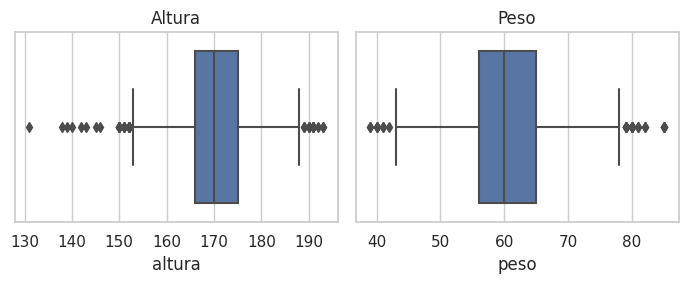

In [23]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

sns.boxplot(x=df_olimpiadas[df_olimpiadas['sexo']=='F']['altura'], ax=axes[0])
axes[0].set_title('Altura')
sns.boxplot(x=df_olimpiadas[df_olimpiadas['sexo']=='F']['peso'], ax=axes[1])
axes[1].set_title('Peso')

plt.tight_layout()

##### amostra

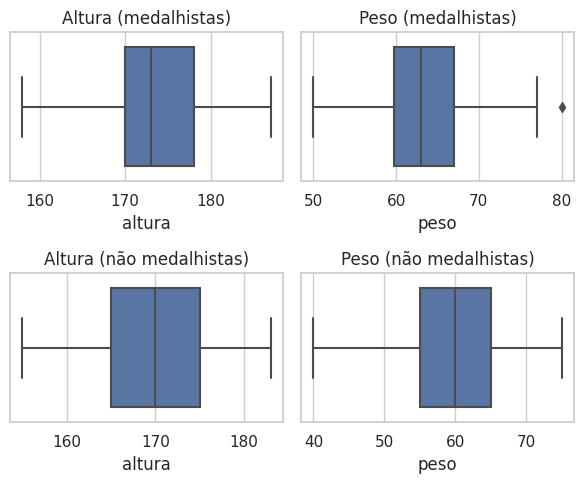

In [24]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))

sns.boxplot(x=amostra_mulheres_medalhistas['altura'], ax=axes[0, 0])
axes[0, 0].set_title('Altura (medalhistas)')
sns.boxplot(x=amostra_mulheres_medalhistas['peso'], ax=axes[0, 1])
axes[0, 1].set_title('Peso (medalhistas)')
sns.boxplot(x=amostra_mulheres_nao_medalhistas['altura'], ax=axes[1, 0])
axes[1, 0].set_title('Altura (não medalhistas)')
sns.boxplot(x=amostra_mulheres_nao_medalhistas['peso'], ax=axes[1, 1])
axes[1, 1].set_title('Peso (não medalhistas)')

plt.tight_layout()

plt.savefig('fig4_1.png', dpi=300)

#### ***Homens***

##### geral

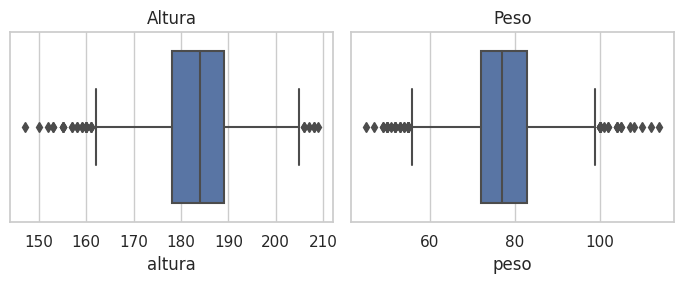

In [25]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

sns.boxplot(x=df_olimpiadas[df_olimpiadas['sexo']=='M']['altura'], ax=axes[0])
axes[0].set_title('Altura')
sns.boxplot(x=df_olimpiadas[df_olimpiadas['sexo']=='M']['peso'], ax=axes[1])
axes[1].set_title('Peso')

plt.tight_layout()

##### amostra

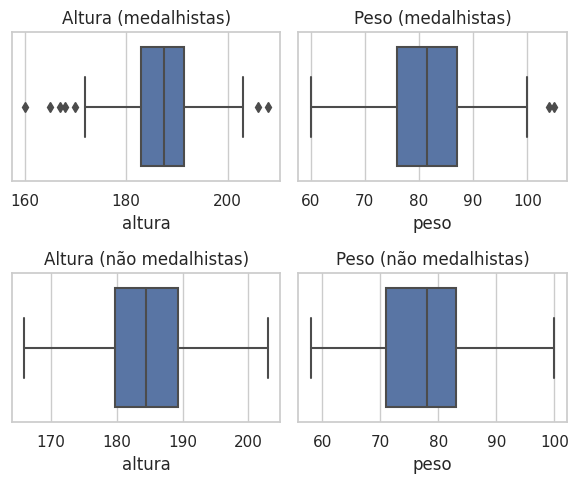

In [26]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))

sns.boxplot(x=amostra_homens_medalhistas['altura'], ax=axes[0, 0])
axes[0, 0].set_title('Altura (medalhistas)')
sns.boxplot(x=amostra_homens_medalhistas['peso'], ax=axes[0, 1])
axes[0, 1].set_title('Peso (medalhistas)')
sns.boxplot(x=amostra_homens_nao_medalhistas['altura'], ax=axes[1, 0])
axes[1, 0].set_title('Altura (não medalhistas)')
sns.boxplot(x=amostra_homens_nao_medalhistas['peso'], ax=axes[1, 1])
axes[1, 1].set_title('Peso (não medalhistas)')

plt.tight_layout()

plt.savefig('fig4_2.png', dpi=300)

### **Distribuições**

#### ***Homens***

##### geral

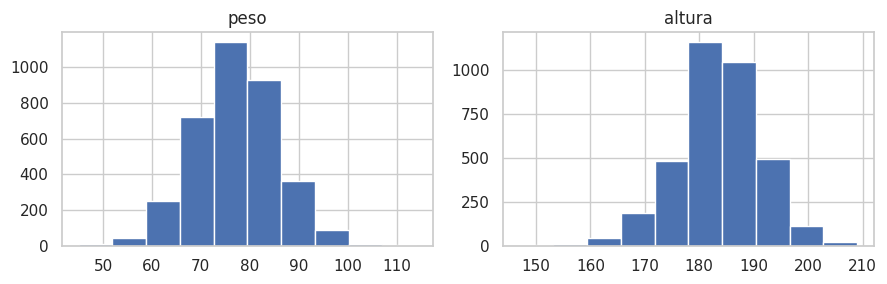

In [27]:
sns.set(style="whitegrid")

df_olimpiadas[df_olimpiadas['sexo']=='M'][['peso', 'altura']].hist(figsize=(9,3))

plt.tight_layout()

##### amostras

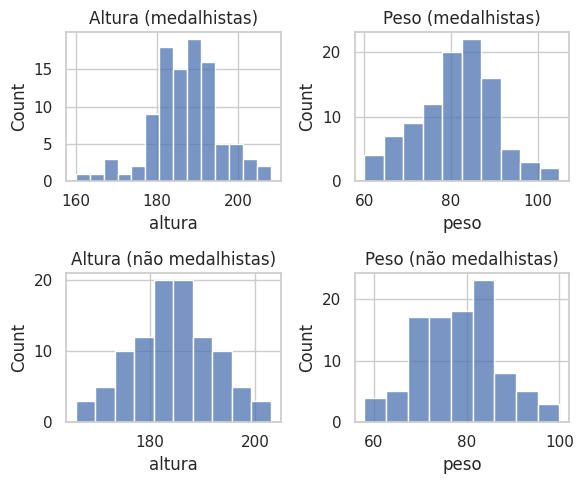

In [28]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))

sns.histplot(x=amostra_homens_medalhistas['altura'], ax=axes[0, 0])
axes[0, 0].set_title('Altura (medalhistas)')
sns.histplot(x=amostra_homens_medalhistas['peso'], ax=axes[0, 1])
axes[0, 1].set_title('Peso (medalhistas)')
sns.histplot(x=amostra_homens_nao_medalhistas['altura'], ax=axes[1, 0])
axes[1, 0].set_title('Altura (não medalhistas)')
sns.histplot(x=amostra_homens_nao_medalhistas['peso'], ax=axes[1, 1])
axes[1, 1].set_title('Peso (não medalhistas)')

plt.tight_layout()

plt.savefig('fig7_1.png', dpi=300)

#### ***Mulheres***

##### geral

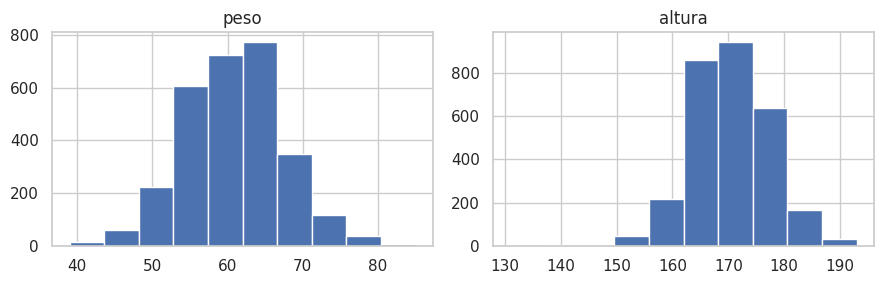

In [29]:
sns.set(style="whitegrid")

df_olimpiadas[df_olimpiadas['sexo']=='F'][['peso', 'altura']].hist(figsize=(9,3))

plt.tight_layout()

##### amostras

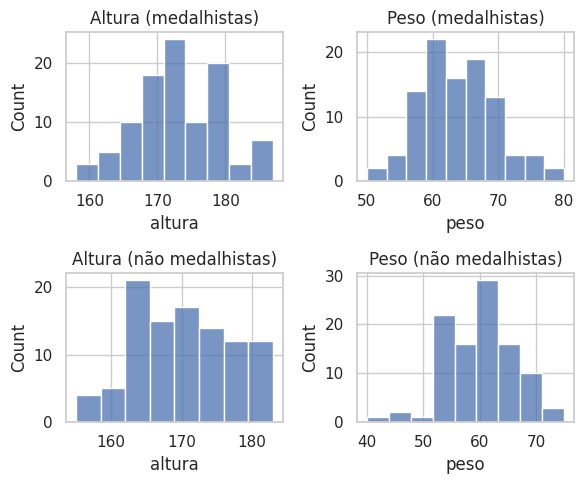

In [30]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))

sns.histplot(x=amostra_mulheres_medalhistas['altura'], ax=axes[0, 0])
axes[0, 0].set_title('Altura (medalhistas)')
sns.histplot(x=amostra_mulheres_medalhistas['peso'], ax=axes[0, 1])
axes[0, 1].set_title('Peso (medalhistas)')
sns.histplot(x=amostra_mulheres_nao_medalhistas['altura'], ax=axes[1, 0])
axes[1, 0].set_title('Altura (não medalhistas)')
sns.histplot(x=amostra_mulheres_nao_medalhistas['peso'], ax=axes[1, 1])
axes[1, 1].set_title('Peso (não medalhistas)')

plt.tight_layout()

plt.savefig('fig7_2.png', dpi=300)

### **Correlações**

In [31]:
def coeficiente(df, var1, var2):
    return df[[var1, var2]].corr().loc[var1, var2].round(4)

##### geral

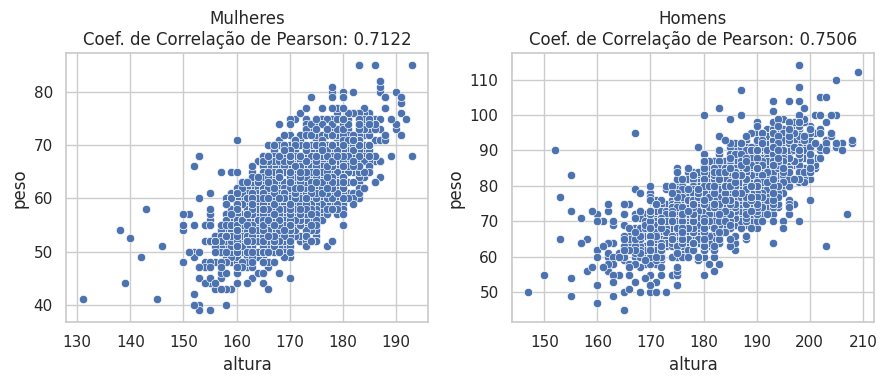

In [32]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

sns.scatterplot(x='altura', y='peso', data=df_olimpiadas[df_olimpiadas['sexo']=='F'], ax=axes[0])
axes[0].set_title('Mulheres\nCoef. de Correlação de Pearson: ' + str(coeficiente(df_olimpiadas[df_olimpiadas['sexo']=='F'], 'peso', 'altura')))

sns.scatterplot(x='altura', y='peso', data=df_olimpiadas[df_olimpiadas['sexo']=='M'], ax=axes[1])
axes[1].set_title('Homens\nCoef. de Correlação de Pearson: ' + str(coeficiente(df_olimpiadas[df_olimpiadas['sexo']=='M'], 'peso', 'altura')))

plt.tight_layout()

plt.savefig('fig5.png', dpi=300)

##### amotras

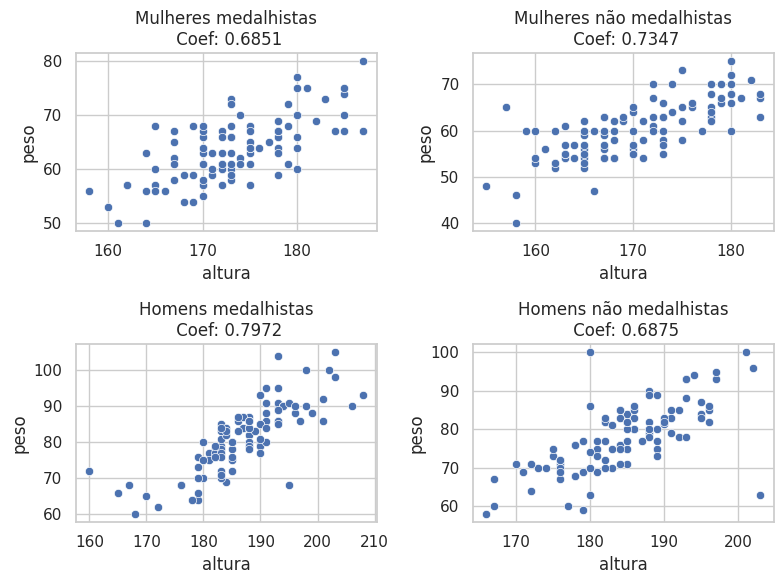

In [33]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

sns.scatterplot(x='altura', y='peso', data=amostra_mulheres_medalhistas, ax=axes[0, 0])
axes[0, 0].set_title('Mulheres medalhistas\n Coef: ' + str(coeficiente(amostra_mulheres_medalhistas, 'peso', 'altura')))
sns.scatterplot(x='altura', y='peso', data=amostra_homens_medalhistas, ax=axes[1, 0])
axes[1, 0].set_title('Homens medalhistas\n Coef: ' + str(coeficiente(amostra_homens_medalhistas, 'peso', 'altura')))
sns.scatterplot(x='altura', y='peso', data=amostra_mulheres_nao_medalhistas, ax=axes[0, 1])
axes[0, 1].set_title('Mulheres não medalhistas\n Coef: ' + str(coeficiente(amostra_mulheres_nao_medalhistas, 'peso', 'altura')))
sns.scatterplot(x='altura', y='peso', data=amostra_homens_nao_medalhistas, ax=axes[1, 1])
axes[1, 1].set_title('Homens não medalhistas\n Coef: ' + str(coeficiente(amostra_homens_nao_medalhistas, 'peso', 'altura')))

plt.tight_layout()

plt.savefig('fig6.png', dpi=300)

## **Testes Estatísticos**

Para Executar o test t independente é necessário:
- Independência: as amostras são de dois grupos destintos (homens/mulheres), então essa condição é atendida
- Normalidade: o teste de shapiro wilk indica normalidade
- Homogeneidade de variância

- independencia é garantida no pré-processamento

- Teste de Shapiro Wilk para normalidade

In [34]:
df_olimpiadas[(df_olimpiadas['ID'].isin(amostra_homens_medalhistas['ID'])) |
              (df_olimpiadas['ID'].isin(amostra_homens_nao_medalhistas['ID'])) |
              (df_olimpiadas['ID'].isin(amostra_mulheres_medalhistas['ID'])) |
              (df_olimpiadas['ID'].isin(amostra_mulheres_nao_medalhistas['ID']))
              ].groupby(['sexo', 'medalhista'])[['altura', 'peso']].agg(lambda x: stats.shapiro(x)[1])

altura      peso
sexo medalhista                    
F    0           0.063541  0.256080
     1           0.364669  0.582506
M    0           0.903509  0.523901
     1           0.050404  0.618823

> - Todas as amostras apresentam normalidade para ambas variáveis foco.

- Teste de Levene para homogeneidade de variância

In [35]:
pd.DataFrame({
    ' ': ['Altura (mulheres)', 'Peso (mulheres)', 'Altura (homens)', 'Peso (homens)'],
    'pvalue': [stats.bartlett(amostra_mulheres_medalhistas['altura'], amostra_mulheres_nao_medalhistas['altura'])[1],
               stats.bartlett(amostra_mulheres_medalhistas['peso'], amostra_mulheres_nao_medalhistas['peso'])[1],
               stats.bartlett(amostra_homens_medalhistas['altura'], amostra_homens_nao_medalhistas['altura'])[1],
               stats.bartlett(amostra_homens_medalhistas['peso'], amostra_homens_nao_medalhistas['peso'])[1]]
}).set_index(' ')

,pvalue
,
Altura (mulheres),0.396023
Peso (mulheres),0.524611
Altura (homens),0.417530
Peso (homens),0.666320


> - Todas os grupos apresentam homogeneidade de variâncias.

In [36]:
pd.DataFrame({
    ' ': ['Altura (mulheres)', 'Peso (mulheres)', 'Altura (homens)', 'Peso (homens)'],
    'pvalue': [stats.ttest_ind(amostra_mulheres_medalhistas['altura'], amostra_mulheres_nao_medalhistas['altura'])[1],
               stats.ttest_ind(amostra_mulheres_medalhistas['peso'], amostra_mulheres_nao_medalhistas['peso'])[1],
               stats.ttest_ind(amostra_homens_medalhistas['altura'], amostra_homens_nao_medalhistas['altura'])[1],
               stats.ttest_ind(amostra_homens_medalhistas['peso'], amostra_homens_nao_medalhistas['peso'])[1]]
}).set_index(' ')

,pvalue
,
Altura (mulheres),0.000836
Peso (mulheres),0.000195
Altura (homens),0.030487
Peso (homens),0.011381


> - Existe diferença entre as médias de altura e peso de mulheres medalhistas e não medalhistas, assim como há diferença entre as médias de altura e peso de homens medalhistas e não medalhistas.

-

-